In [169]:
#Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import shap
shap.initjs()
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

                                            LOAD 12 DATA FOR FRAUD

In [170]:
# List of file names for fraud and non-fraud datasets
FRAUD = "/home/ashley/Desktop/IBM CLEANED/FRAUD/"
NON_FRAUD = "/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/"

In [171]:
#load fraud dataset
Fraud_dataset = [pd.read_csv(FRAUD + f) for f in ["cleaned_HI_large_patterns.csv","cleaned_HI_medium_patterns.csv","cleaned_HI_small_patterns.csv","cleaned_LI_large_patterns.csv","cleaned_LI_medium_patterns.csv","cleaned_LI_small_patterns.csv"]]

In [172]:
Fraud_dataset

[               Timestamp  From Bank    Account  To Bank    Account.1  \
 0       2022/08/09 05:14        952  8139F54E0   111632    8062C56E0   
 1       2022/08/13 13:09     111632  8062C56E0     8456    81363F620   
 2       2022/08/15 07:40     118693  823D5EB90    13729    801CF2E60   
 3       2022/08/15 14:19      13729  801CF2E60   123621    81A7090F0   
 4       2022/08/13 12:40      24750  81363F410   213834    808757B00   
 ...                  ...        ...        ...      ...          ...   
 137930  2022/11/08 09:12       1538    8008279    12883    801345490   
 137931  2022/11/20 18:34       1538    8008279     1226    8001672F0   
 137932  2022/11/25 11:27       1538    8008279     1213    8006E6420   
 137933  2022/11/28 09:15       1538    8008279     1827  8.0117E+144   
 137934  2022/12/10 15:28       1538    8008279        0    801641AE0   
 
         Amount Received Receiving Currency  Amount Paid Payment Currency  \
 0               5331.44          US Dollar  

In [173]:
fraud = pd.concat(Fraud_dataset,ignore_index=True)

In [174]:
fraud

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/09 05:14,952,8139F54E0,111632,8062C56E0,5331.44,US Dollar,5331.44,US Dollar,ACH,1
1,2022/08/13 13:09,111632,8062C56E0,8456,81363F620,5602.59,US Dollar,5602.59,US Dollar,ACH,1
2,2022/08/15 07:40,118693,823D5EB90,13729,801CF2E60,1400.54,US Dollar,1400.54,US Dollar,ACH,1
3,2022/08/15 14:19,13729,801CF2E60,123621,81A7090F0,1467.94,US Dollar,1467.94,US Dollar,ACH,1
4,2022/08/13 12:40,24750,81363F410,213834,808757B00,16898.29,US Dollar,16898.29,US Dollar,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
188275,2022/09/14 09:36,27,80BF623F0,27009,80B880140,12499.20,US Dollar,12499.20,US Dollar,ACH,1
188276,2022/09/14 10:06,27,80BF623F0,16934,805F5B360,3902.74,Euro,3902.74,Euro,ACH,1
188277,2022/09/14 14:10,27,80BF623F0,531,8057B5070,15565.88,US Dollar,15565.88,US Dollar,ACH,1
188278,2022/09/10 22:10,15516,8026EA390,25788,8026EA1A0,3431.61,Euro,3431.61,Euro,ACH,1


In [175]:
#Reading non fraud data 
non_fraud1 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/HI-Large_Trans.csv",nrows=62760)
non_fraud2 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/HI-Medium_Trans.csv",nrows=62760)
non_fraud3 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/HI-Small_Trans.csv",nrows=62760)
non_fraud4 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/LI-Large_Trans.csv",nrows=62760)
non_fraud5 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/LI-Medium_Trans.csv",nrows=62760)
non_fraud6 = pd.read_csv("/home/ashley/Desktop/IBM CLEANED/NON_FRAUD/LI-Small_Trans.csv",nrows=62760)

In [176]:
#Concatinating the non fraud data
non_fraud = pd.concat([non_fraud1,non_fraud2,non_fraud3,non_fraud4,non_fraud5,non_fraud6])

In [177]:
non_fraud

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/08/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/08/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/08/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/08/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
62755,2022/09/01 00:06,1889,809D62730,1889,809D62730,13.86,US Dollar,13.86,US Dollar,Reinvestment,0
62756,2022/09/01 00:25,3100,809D7B8D0,113213,811B5B480,9.42,US Dollar,9.42,US Dollar,Credit Card,0
62757,2022/09/01 00:24,217226,809D8DC30,17256,80676D2F0,48.14,US Dollar,48.14,US Dollar,Credit Card,0
62758,2022/09/01 00:00,116342,809D8F7E0,116342,809D8F7E0,4.17,US Dollar,4.17,US Dollar,Reinvestment,0


In [178]:
non_fraud.to_csv("non_fraud.csv",index=False)

                                                    MERGE FRAUD AND NON FRAUD DATASET

In [179]:
Comp_data_fraud = pd.concat([fraud,non_fraud])

In [180]:
Comp_data_fraud

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/08/09 05:14,952,8139F54E0,111632,8062C56E0,5331.44,US Dollar,5331.44,US Dollar,ACH,1
1,2022/08/13 13:09,111632,8062C56E0,8456,81363F620,5602.59,US Dollar,5602.59,US Dollar,ACH,1
2,2022/08/15 07:40,118693,823D5EB90,13729,801CF2E60,1400.54,US Dollar,1400.54,US Dollar,ACH,1
3,2022/08/15 14:19,13729,801CF2E60,123621,81A7090F0,1467.94,US Dollar,1467.94,US Dollar,ACH,1
4,2022/08/13 12:40,24750,81363F410,213834,808757B00,16898.29,US Dollar,16898.29,US Dollar,ACH,1
...,...,...,...,...,...,...,...,...,...,...,...
62755,2022/09/01 00:06,1889,809D62730,1889,809D62730,13.86,US Dollar,13.86,US Dollar,Reinvestment,0
62756,2022/09/01 00:25,3100,809D7B8D0,113213,811B5B480,9.42,US Dollar,9.42,US Dollar,Credit Card,0
62757,2022/09/01 00:24,217226,809D8DC30,17256,80676D2F0,48.14,US Dollar,48.14,US Dollar,Credit Card,0
62758,2022/09/01 00:00,116342,809D8F7E0,116342,809D8F7E0,4.17,US Dollar,4.17,US Dollar,Reinvestment,0


In [181]:
Comp_data_fraud.to_csv("Comp_data_fraud.csv",index=False)

                                                                SHUFFLE

In [182]:
Comp_data_fraud_shuffled = Comp_data_fraud.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [183]:
Comp_data_fraud_shuffled.to_csv("Comp_data_fraud_shuffled.csv",index=False)

In [184]:
Comp_data_fraud_shuffled

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/04 13:13,293924,822C3FBE0,297435,823DD2F90,4838.49,UK Pound,4838.49,UK Pound,ACH,1
1,2022/08/01 00:14,110851,8056674B0,110851,8056674B0,15.72,US Dollar,15.72,US Dollar,Reinvestment,0
2,2022/08/01 00:28,315180,805A80880,315180,805A80880,726.73,US Dollar,726.73,US Dollar,Reinvestment,0
3,2022/09/04 09:30,293924,822C3FBE0,297435,823DD2F90,9730.78,UK Pound,9730.78,UK Pound,ACH,1
4,2022/09/01 00:12,1922,8009D0670,2208,806673200,205059.32,US Dollar,205059.32,US Dollar,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
564835,2022/10/18 04:27,10409,80BEFCE40,14595,809E51F90,1507.49,Euro,1507.49,Euro,ACH,1
564836,2022/09/01 00:18,1922,8014A66E0,1922,8014A66E0,24076.13,US Dollar,24076.13,US Dollar,Reinvestment,0
564837,2022/09/01 00:27,6156,807C974B0,6156,807C974B0,14.28,US Dollar,14.28,US Dollar,Reinvestment,0
564838,2022/12/04 16:44,0,8004AC580,25,800083280,126338.84,Yuan,126338.84,Yuan,ACH,1


In [185]:
Comp_data_fraud_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564840 entries, 0 to 564839
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           564840 non-null  object 
 1   From Bank           564840 non-null  int64  
 2   Account             564840 non-null  object 
 3   To Bank             564840 non-null  int64  
 4   Account.1           564840 non-null  object 
 5   Amount Received     564840 non-null  float64
 6   Receiving Currency  564840 non-null  object 
 7   Amount Paid         564840 non-null  float64
 8   Payment Currency    564840 non-null  object 
 9   Payment Format      564840 non-null  object 
 10  Is Laundering       564840 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 47.4+ MB


                                           CHANGING CATEGORICAL ATTRIBUTE INTO NUMERICAL ATTRIBUTE

In [186]:
#Identify all categorical variables
cat_columns = Comp_data_fraud_shuffled.select_dtypes(['object']).columns

In [187]:
#Convert all categorical variables to numeric
cat_columns = Comp_data_fraud_shuffled[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [188]:
cat_columns

,Timestamp,Account,Account.1,Receiving Currency,Payment Currency,Payment Format
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,2,2,2,1,1,1
3,3,0,0,0,0,0
4,4,3,3,1,1,2
...,...,...,...,...,...,...
564835,101487,216286,277900,4,4,0
564836,64,158300,117701,1,1,1
564837,15,189898,190597,1,1,1
564838,101488,14642,140,6,6,0


In [189]:
#Calling the dataPayment Currency	Payment Format
Comp_data_fraud_shuffled.size

6213240

In [190]:
#Dropping the categorical columns
num_columns = Comp_data_fraud_shuffled.drop(['Timestamp','Account','Account.1','Receiving Currency','Payment Currency','Payment Format'], axis=1)

In [191]:
num_columns

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
0,293924,297435,4838.49,4838.49,1
1,110851,110851,15.72,15.72,0
2,315180,315180,726.73,726.73,0
3,293924,297435,9730.78,9730.78,1
4,1922,2208,205059.32,205059.32,0
...,...,...,...,...,...
564835,10409,14595,1507.49,1507.49,1
564836,1922,1922,24076.13,24076.13,0
564837,6156,6156,14.28,14.28,0
564838,0,25,126338.84,126338.84,1


In [192]:
ML_dataFraud = pd.concat([cat_columns,num_columns.reset_index(drop=True)],axis=1)

In [193]:
ML_dataFraud

,Timestamp,Account,Account.1,Receiving Currency,Payment Currency,Payment Format,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
0,0,0,0,0,0,0,293924,297435,4838.49,4838.49,1
1,1,1,1,1,1,1,110851,110851,15.72,15.72,0
2,2,2,2,1,1,1,315180,315180,726.73,726.73,0
3,3,0,0,0,0,0,293924,297435,9730.78,9730.78,1
4,4,3,3,1,1,2,1922,2208,205059.32,205059.32,0
...,...,...,...,...,...,...,...,...,...,...,...
564835,101487,216286,277900,4,4,0,10409,14595,1507.49,1507.49,1
564836,64,158300,117701,1,1,1,1922,1922,24076.13,24076.13,0
564837,15,189898,190597,1,1,1,6156,6156,14.28,14.28,0
564838,101488,14642,140,6,6,0,0,25,126338.84,126338.84,1


In [194]:
#Exporting to external files and save as csv
ML_dataFraud.to_csv("ML_dataFraud.csv",index=False)

                                                SPLITTING DATA INTO TRAIN,VALIDATE AND TEST

In [195]:
#Labelling the data
X = ML_dataFraud.drop('Is Laundering', axis=1)  # Features
y = ML_dataFraud['Is Laundering']  # Labels (0 for legitimate, 1 for fraudulent)

In [196]:
sm=SMOTE(random_state=42, k_neighbors=5)

In [197]:
X_res,y_res=sm.fit_resample(X,y)

In [198]:
#Splitting data set into training and testing dataset
X_train,X_test,y_train,y_test =train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [199]:
#Splitting to training and validation
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [200]:
#Initialize standard scaler 
scaler = StandardScaler()

In [201]:
#Fit the scaler on the training and validate data and transform both training validate and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.transform(X_test)

                                                            MODEL TRAINING

In [202]:
#Initialize the model
rf_model = RandomForestClassifier(n_estimators=100,random_state = 42)
lg_model = LogisticRegression(random_state = 42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state = 42)
knn_model = KNeighborsClassifier()

In [203]:
#Train model using training data set
rf_model.fit(X_train_scaled,y_train)
lg_model.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [204]:
#Train model using training data set
nb_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

                                                                MAKE PREDICTIONS ON VALIDATION SET

In [205]:
#Make predictions using validation set
rf_val_pred = rf_model.predict(X_val_scaled)
#lg_val_pred = lg_model.predict(X_val)
#nb_val_pred = nb_model.predict(X_val)
#dt_val_pred = dt_model.predict(X_val)
#knn_val_pred = knn_model.predict(X_val)

In [207]:
#Classification report on the validation set
print("Random Forest Report:\n",classification_report(y_val,rf_val_pred))
#print("Logistic Regression Report:\n",classification_report(y_val,lg_val_pred))
#print("Naive Bayes Report:\n",classification_report(y_val,nb_val_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56535
           1       1.00      1.00      1.00     56430

    accuracy                           1.00    112965
   macro avg       1.00      1.00      1.00    112965
weighted avg       1.00      1.00      1.00    112965



In [ ]:
#print("Decision Tree Report:\n",classification_report(y_val,dt_val_pred))
#print("KNN Report:\n",classification_report(y_val,knn_val_pred))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67     56407
           1       0.33      0.33      0.33     28319

    accuracy                           0.55     84726
   macro avg       0.50      0.50      0.50     84726
weighted avg       0.55      0.55      0.55     84726

KNN Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67     56407
           1       0.33      0.31      0.32     28319

    accuracy                           0.56     84726
   macro avg       0.50      0.50      0.50     84726
weighted avg       0.55      0.56      0.56     84726



                                                                   MAKE PREDICTIONS ON TEST SET

In [208]:
rf_test_pred = rf_model.predict(X_test_scaled)
#lg_test_pred = lg_model.predict(X_test)
#nb_test_pred = nb_model.predict(X_test)
#dt_test_pred = dt_model.predict(X_test)
#knn_test_pred = knn_model.predict(X_test)

In [209]:
#Model performance using classification report 
print("Random Forest Report:\n", classification_report(y_test,rf_test_pred))
#print("Logistic Regression Report:\n", classification_report(y_test,lg_test_pred))
#print("Naive BAyes Report:\n", classification_report(y_test,nb_test_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56473
           1       1.00      1.00      1.00     56492

    accuracy                           1.00    112965
   macro avg       1.00      1.00      1.00    112965
weighted avg       1.00      1.00      1.00    112965



In [210]:
#Model performance using classification report 
#print("Decision Tree Report:\n", classification_report(y_test,dt_test_pred))
#print("KNN Report:\n", classification_report(y_test,knn_test_pred))

                                                        MEASURING PERFOMANCE OF THE MODEL

In [211]:
#Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test,rf_test_pred)
#lg_accuracy = accuracy_score(y_test,lg_test_pred)
#nb_accuracy = accuracy_score(y_test,nb_test_pred)
#dt_accuracy = accuracy_score(y_test,dt_test_pred)
#knn_accuracy = accuracy_score(y_test,knn_test_pred)

In [212]:
print("Random Forest Accuracy Score:",rf_accuracy)
#print("Logistic Regression Accuracy Score:",lg_accuracy)
#print("Naive Bayes Accuracy Score:",nb_accuracy)
#print("Decision Tree Accuracy Score:",dt_accuracy)
#print("KNN Accuracy Score:",knn_accuracy)

Random Forest Accuracy Score: 0.9998406586110742


                                SHAP

In [ ]:
#Calculating shap values using testing set
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
print(shap_values)

[array([[-4.47702261e-01, -6.11816862e-03,  3.41039988e-04, ...,
        -1.02510596e-02,  7.83127108e-04, -1.37400439e-04],
       [-4.44655119e-01, -7.66521656e-03,  1.62041815e-03, ...,
        -1.11532549e-02, -1.41508309e-04, -2.87338653e-03],
       [-4.47702261e-01, -6.11816862e-03,  3.41039988e-04, ...,
        -1.02510596e-02,  7.83127108e-04, -1.37400439e-04],
       ...,
       [-4.47987452e-01, -7.73654913e-03, -1.55074392e-03, ...,
        -1.11041184e-02, -1.52799623e-04, -2.92533322e-03],
       [-4.44655119e-01, -7.66521656e-03,  1.62041815e-03, ...,
        -1.11532549e-02, -1.41508309e-04, -2.87338653e-03],
       [-4.44655119e-01, -7.66521656e-03,  1.62041815e-03, ...,
        -1.11532549e-02, -1.41508309e-04, -2.87338653e-03]]), array([[ 4.47702261e-01,  6.11816862e-03, -3.41039988e-04, ...,
         1.02510596e-02, -7.83127108e-04,  1.37400439e-04],
       [ 4.44655119e-01,  7.66521656e-03, -1.62041815e-03, ...,
         1.11532549e-02,  1.41508309e-04,  2.87338653

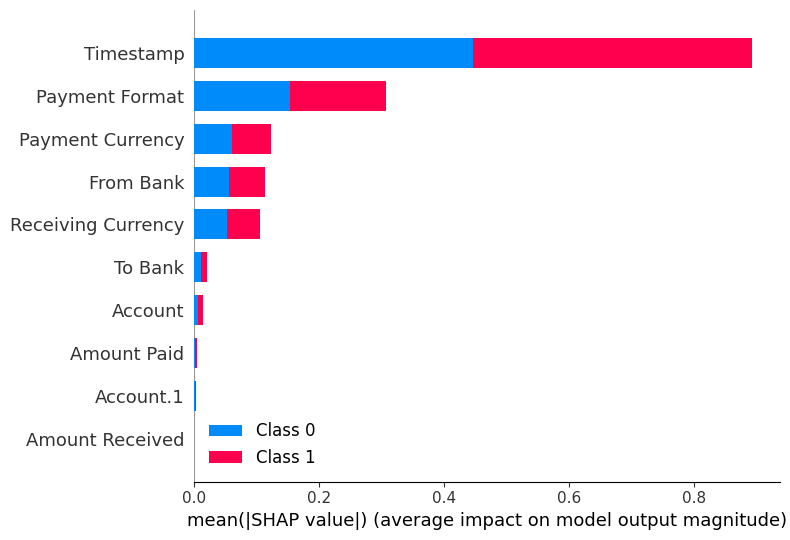

In [ ]:
#Display the summary plot using shap values and testing set
shap.summary_plot(shap_values,X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


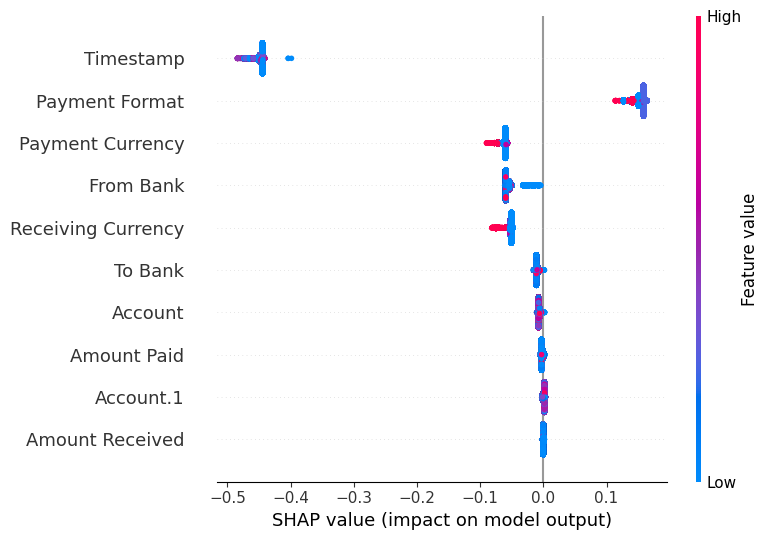

In [ ]:
#Summary plot for label 0
shap.summary_plot(shap_values[0],X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


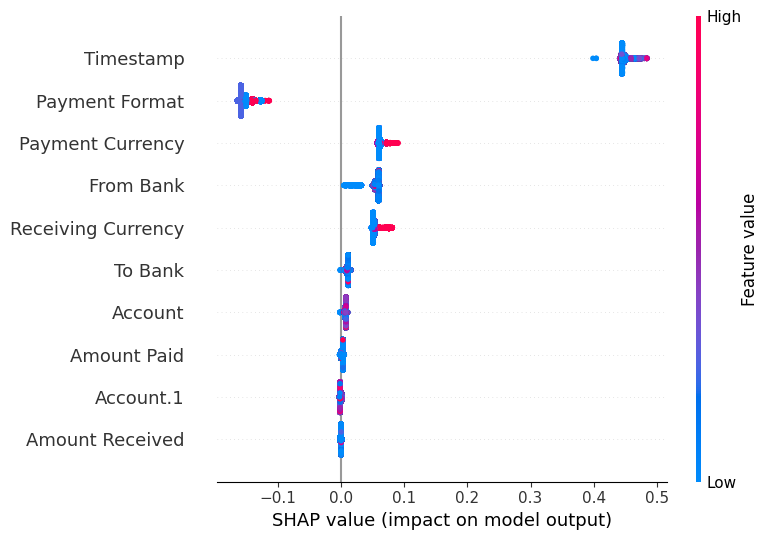

In [ ]:
#Summary plot for label 1
shap.summary_plot(shap_values[1],X_test)

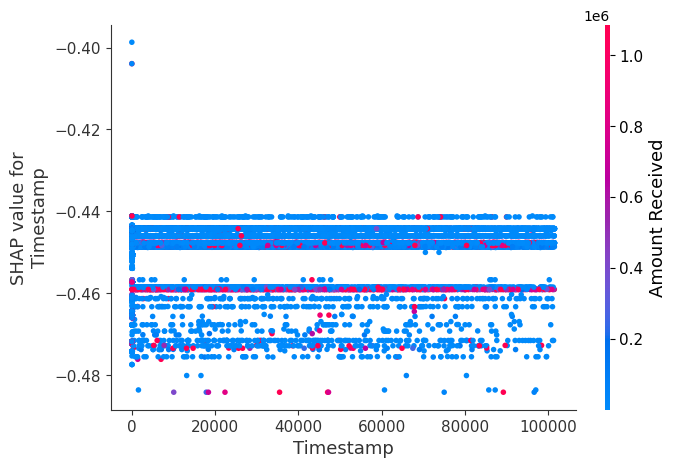

In [ ]:
#Dependency Plot
shap.dependence_plot("Timestamp", shap_values[0],X_test,interaction_index="Amount Received")

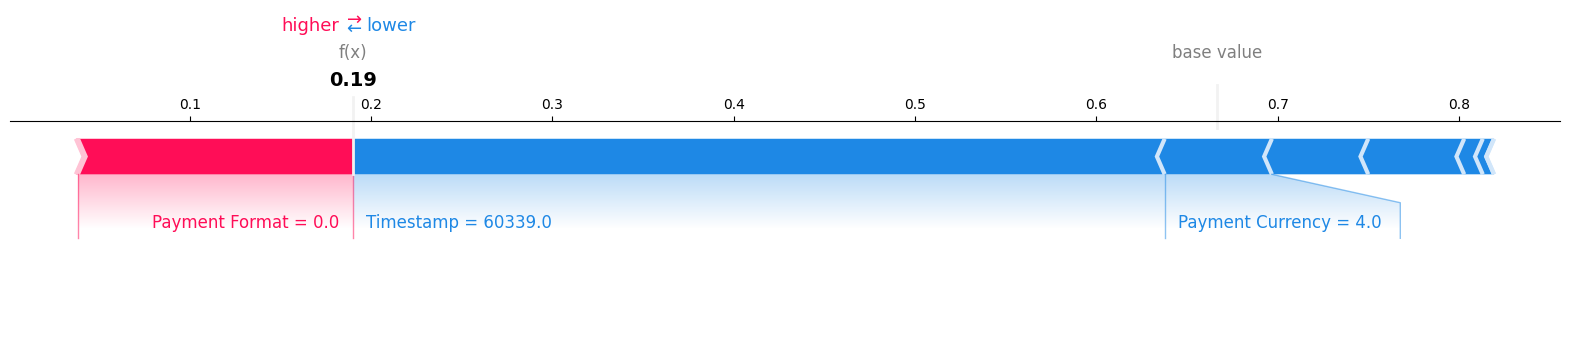

In [ ]:
#Force plot 
shap.plots.force(explainer.expected_value[0],shap_values[0][0,:],X_test.iloc[0,:],matplotlib=True)

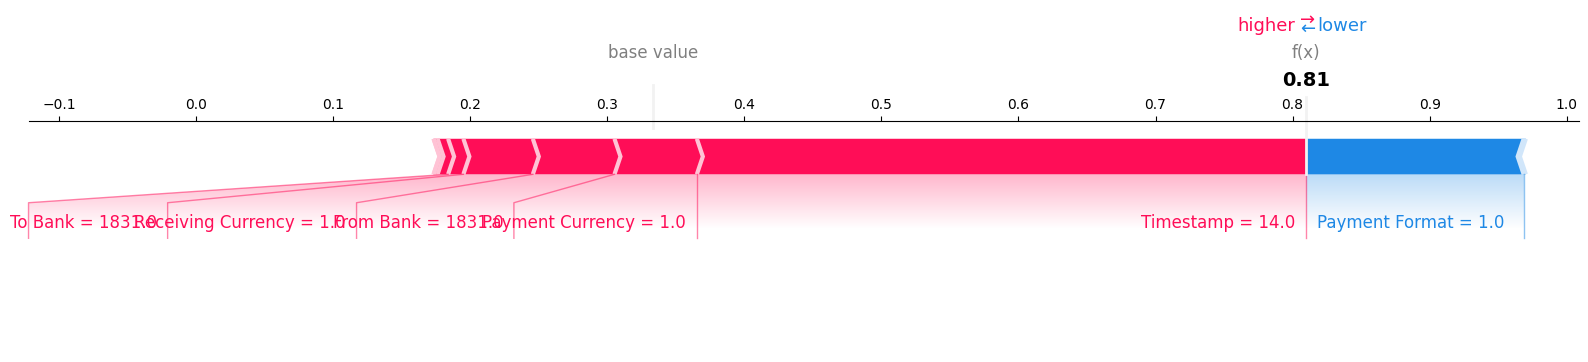

In [ ]:
#Force plot 
shap.plots.force(explainer.expected_value[1],shap_values[1][1,:],X_test.iloc[1,:],matplotlib=True)

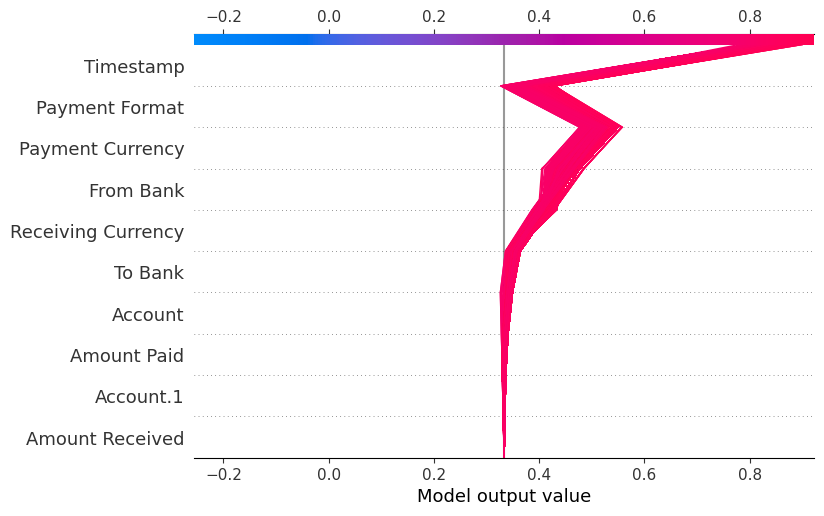

In [ ]:
#DECISION PLOT
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test.columns,ignore_warnings=True)

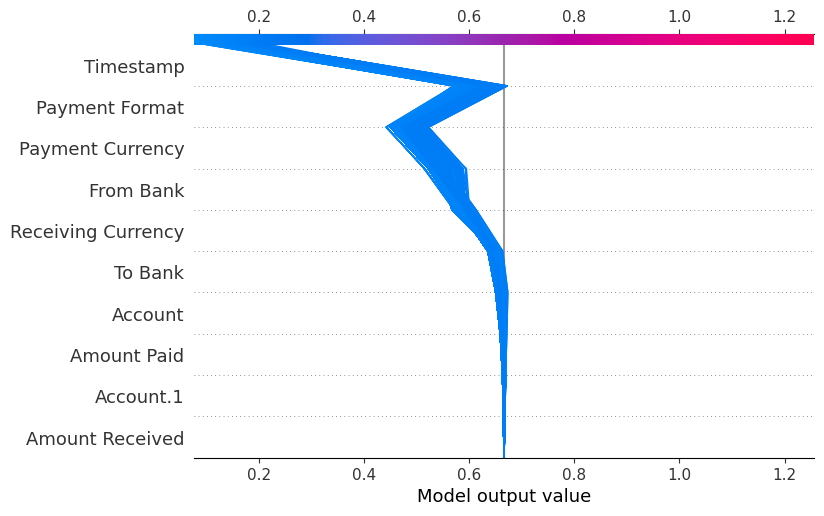

In [ ]:
#DECISION PLOT
shap.decision_plot(explainer.expected_value[0],shap_values[0],X_test.columns,ignore_warnings=True)